<a href="https://colab.research.google.com/github/bmathew05/MACHINE-LEARNING/blob/main/SMS_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# SMS Spam Detection Project

# This project aims to develop a robust and accurate system for detecting spam messages in SMS data. Utilizing Natural Language Processing (NLP) techniques and various machine learning algorithms, the project aims to classify incoming messages as either spam or non-spam (ham).

# **Project Workflow & Highlights:**

# 1. **Data Collection and Preprocessing:** The project gathers SMS data and performs essential preprocessing steps to prepare it for model training. These steps include cleaning the data by removing non-alphanumeric characters, tokenizing messages into individual words, stemming words to their root form (e.g., "running" to "run"), and removing common stop words (e.g., "the", "and") to reduce noise and focus on meaningful words.
# 2. **Feature Extraction:** Using TF-IDF (Term Frequency-Inverse Document Frequency), the project converts text data into numerical features that can be used by machine learning models. This process helps identify important words in messages by considering their frequency and prevalence across the dataset.
# 3. **Model Training and Evaluation:** Five different classification algorithms are trained and evaluated to identify the most effective model for spam detection. These models include K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Random Forest (RF), Decision Tree (DT), and Naive Bayes (NB). Performance is assessed using metrics such as accuracy and classification reports, providing insights into the models' ability to correctly classify spam and non-spam messages.

# **Key Findings and Results:**

# * **Best Performing Models:** Among the evaluated models, Random Forest (RF), Naive Bayes (NB), Support Vector Machine (SVM), and Decision Tree (DT) demonstrated superior performance in accurately classifying SMS messages.
# * **High Accuracy:**  RF, NB, SVM, and DT achieved high accuracy scores above 90% on the test data. This indicates their effectiveness in identifying spam messages while minimizing false positives.
# * **Effective Classification:** The classification reports further confirm the models' ability to distinguish between spam and non-spam, exhibiting good precision, recall, and F1-scores for both classes.
# * **K-Nearest Neighbors (KNN) was the least accurate model for SMS spam detection in this project.**

# **Project Goal:**

# To develop a reliable and accurate SMS spam detection system that can effectively filter unwanted messages, providing a seamless and secure communication experience for users.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [10]:
df2 = pd.read_csv('/content/drive/MyDrive/ML DATASETS/SMS_test.csv', encoding='ISO-8859-1')
df1 = pd.read_csv('/content/drive/MyDrive/ML DATASETS/SMS_train.csv', encoding='ISO-8859-1')

In [11]:
#join two df
df = pd.concat([df1, df2],axis=0)
df.head()
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [12]:

df.drop('S. No.', axis=1, inplace=True)




In [13]:
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [14]:
df.isna().sum()

,0
Message_body,0
Label,0


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
#Find any duplicate values exist in table
df.duplicated().sum()

0

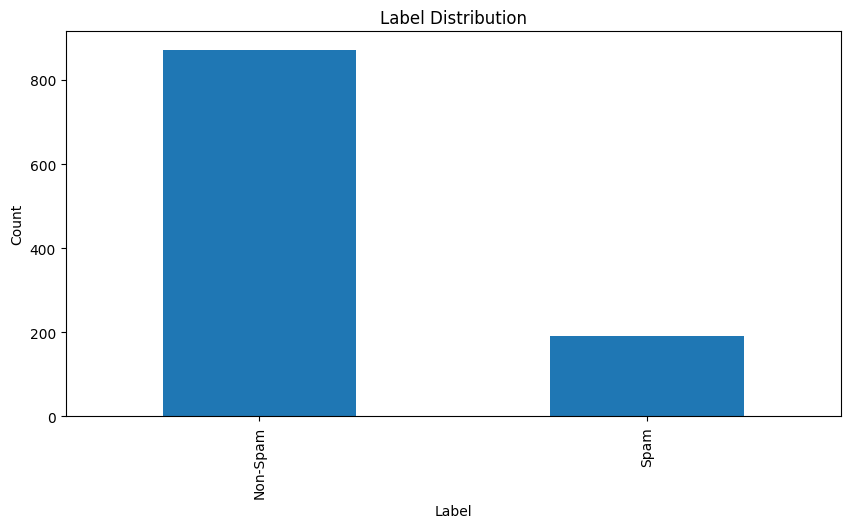

In [17]:
#Plot Label Distribution

plt.figure(figsize=(10,5))
df['Label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [18]:
# Converts 'Spam' to 1 and 'Non-Spam' to 0 in the 'Label' column for numerical representation.
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
121,Try to do something dear. You read something f...,0
122,Sun ah... Thk mayb can if dun have anythin on....,0
123,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [19]:
# Extracts the 'Message_body' column from the dataframe 'df' and stores it in the variable 'msg'.
msg = df['Message_body']
msg


,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...
121,Try to do something dear. You read something f...
122,Sun ah... Thk mayb can if dun have anythin on....
123,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [20]:
# Download necessary NLTK resources for text preprocessing: stopwords and punkt tokenizer models.
import nltk
nltk.download('stopwords')  # Downloads the stopwords dataset
nltk.download('punkt')      # Downloads the punkt tokenizer models


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
# Removes non-alphanumeric characters from 'msg' using regular expression.
import re
msg=msg.str.replace('[^A-Za-z0-9]',' ',regex=True)
msg

,Message_body
0,Rofl Its true to its name
1,The guy did some bitching but I acted like i d...
2,Pity was in mood for that So any other s...
3,Will b going to esplanade fr home
4,This is the 2nd time we have tried 2 contact u...
...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...
121,Try to do something dear You read something f...
122,Sun ah Thk mayb can if dun have anythin on ...
123,SYMPTOMS when U are in love 1 U like listeni...


In [22]:

# collect meaningful words above 2 letters
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x: ' '.join([i for i in word_tokenize(x)if len(i)>=3]))
msg

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Message_body
0,Rofl Its true its name
1,The guy did some bitching but acted like inter...
2,Pity was mood for that any other suggestions
3,Will going esplanade home
4,This the 2nd time have tried contact have won ...
...,...
120,wonders WORLD 7th You 6th style 5th smile 4th ...
121,Try something dear You read something for exams
122,Sun Thk mayb can dun have anythin Thk have boo...
123,SYMPTOMS when are love like listening songs ge...


In [23]:
# Perform text preprocessing using stemming
# - Tokenize each text message into words.
# - Convert each word to lowercase to ensure uniformity.
# - Apply Porter stemming to reduce words to their root forms (e.g., "running" -> "run").
# - Reconstruct the message by joining the stemmed words back into a string.

from nltk.stem import PorterStemmer
ps=PorterStemmer()
msg=msg.apply(lambda x: ' '.join([ps.stem(i.lower()) for i in word_tokenize(x)]))
msg

,Message_body
0,rofl it true it name
1,the guy did some bitch but act like interest b...
2,piti wa mood for that ani other suggest
3,will go esplanad home
4,thi the 2nd time have tri contact have won the...
...,...
120,wonder world 7th you 6th style 5th smile 4th p...
121,tri someth dear you read someth for exam
122,sun thk mayb can dun have anythin thk have boo...
123,symptom when are love like listen song get sto...


In [24]:
# Perform text preprocessing by removing stopwords
# - Tokenize each text message into words.
# - Remove common stopwords (e.g., 'the', 'and', 'is') from the list of words.
# - Reconstruct the message by joining the remaining words back into a string.
# This helps reduce noise and focus on the meaningful words in the text.

from nltk.corpus import stopwords
sw=stopwords.words('english')
msg=msg.apply(lambda x: ' '.join([i for i in word_tokenize(x)if i not in sw]))
msg

,Message_body
0,rofl true name
1,guy bitch act like interest buy someth els nex...
2,piti wa mood ani suggest
3,go esplanad home
4,thi 2nd time tri contact 750 pound prize claim...
...,...
120,wonder world 7th 6th style 5th smile 4th perso...
121,tri someth dear read someth exam
122,sun thk mayb dun anythin thk book lesson pilat...
123,symptom love like listen song get stop see nam...


In [25]:
# Convert text data into numerical features using TF-IDF
# - TF-IDF helps identify important words by considering how often they appear in a document
#   and how common they are across all documents.

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
x=tf.fit_transform(msg)
x

<1064x2871 sparse matrix of type '<class 'numpy.float64'>'
	with 8879 stored elements in Compressed Sparse Row format>

In [26]:
y=df['Label'].values

In [27]:
x.dtype

dtype('float64')

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train

<744x2871 sparse matrix of type '<class 'numpy.float64'>'
	with 6039 stored elements in Compressed Sparse Row format>

In [29]:
# Train and evaluate different classifiers
# - A list of classifiers (KNN, SVM, Random Forest, Decision Tree, Naive Bayes) is defined.
# - For each model, the following steps are performed:
#   1. Fit the model to the training data.
#   2. Make predictions on the test data.
#   3. Print the accuracy and classification report to evaluate the model's performance.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
gnb=BernoulliNB()
lst=[knn,svc,rfc,dtc,gnb]
for i in lst:
  print(f'Model is {i}')
  print("*************")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(f'Accuracy is {accuracy_score(y_test,y_pred)}')
  print(f'classification report is {classification_report(y_test,y_pred)}')

Model is KNeighborsClassifier()
*************
Accuracy is 0.821875
classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       259
           1       1.00      0.07      0.12        61

    accuracy                           0.82       320
   macro avg       0.91      0.53      0.51       320
weighted avg       0.85      0.82      0.75       320

Model is SVC()
*************
Accuracy is 0.90625
classification report is               precision    recall  f1-score   support

           0       0.90      0.99      0.94       259
           1       0.94      0.54      0.69        61

    accuracy                           0.91       320
   macro avg       0.92      0.77      0.82       320
weighted avg       0.91      0.91      0.90       320

Model is RandomForestClassifier()
*************
Accuracy is 0.94375
classification report is               precision    recall  f1-score   support

           0       0.94      1.0